# 3-Way ANOVA
### by Wiktoria Kopciał s197774 Data Engineering 01.2005

The three-way ANOVA is an extension of the two-way ANOVA for assessing whether there is an interaction effect between three independent categorical variables on a continuous outcome variable.

We’ll use the **headache dataset**, which contains the measures of migraine headache episode pain score in 72 participants treated with three different treatments. The participants include 36 males and 36 females. Males and females were further subdivided into whether they were at low or high risk of migraine.

We want to understand how each independent variable (type of treatments, risk of migraine and gender) interact to predict the pain score.

In [24]:
import pandas as pd

# URL to the CSV file
url = "https://github.com/kflisikowski/ds/raw/master/headache.csv"

# Load the data into a DataFrame
data = pd.read_csv(url)

# Display the first few rows of the data
print(data)

    id  gender  risk treatment  pain_score
0    1    male   low         X   79.311695
1    2    male   low         X   76.843399
2    3    male   low         X   70.832421
3    4    male   low         X   81.163944
4    5    male   low         X   75.052213
..  ..     ...   ...       ...         ...
67  68  female  high         Z   82.786300
68  69  female  high         Z   81.265636
69  70  female  high         Z   80.419553
70  71  female  high         Z   87.142265
71  72  female  high         Z   79.609041

[72 rows x 5 columns]


## Descriptive statistics

Let's look at the histogram of our data.

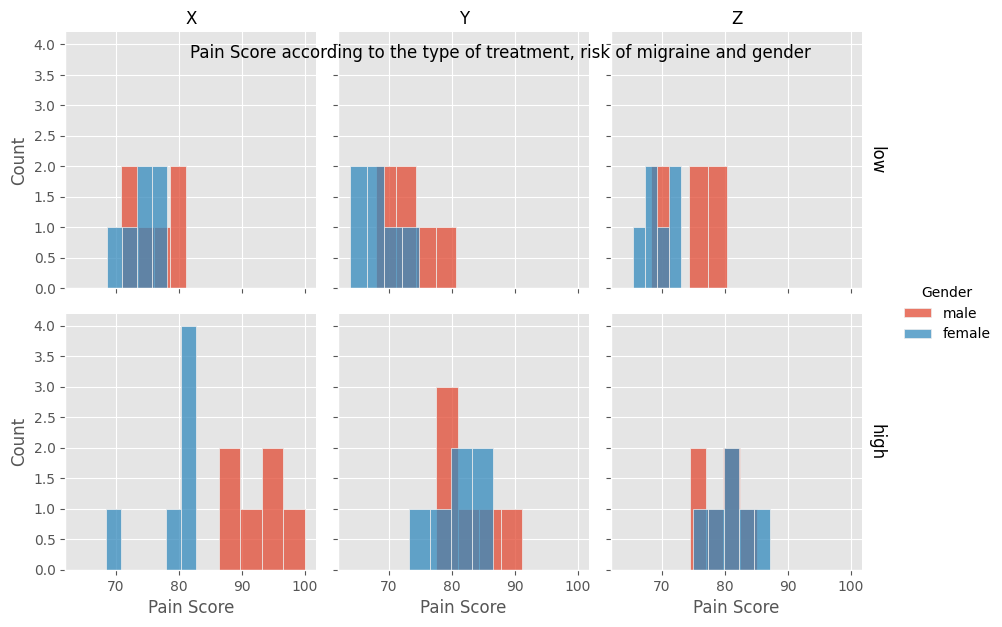

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
g = sns.FacetGrid(data, col="treatment", row="risk", hue="gender", margin_titles=True)
g.map_dataframe(sns.histplot, x="pain_score")

# Add titles and labels
g.set_axis_labels("Pain Score", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title="Gender")
g.figure.suptitle("Pain Score according to the type of treatment, risk of migraine and gender")
g.figure.subplots_adjust(top=1)

# Apply a classic theme
plt.style.use('ggplot')

# Show the plot
plt.show()

We can see that distribution of pain score for treatment X and high risk of migraine between genders differs the most. Some differences can be seen in treatment x and z when there is low risk of migraine between genders.

In some places the bars are overlapping which enaboles us to see clearly some information. I will show the same data on two plots for Males and Females.

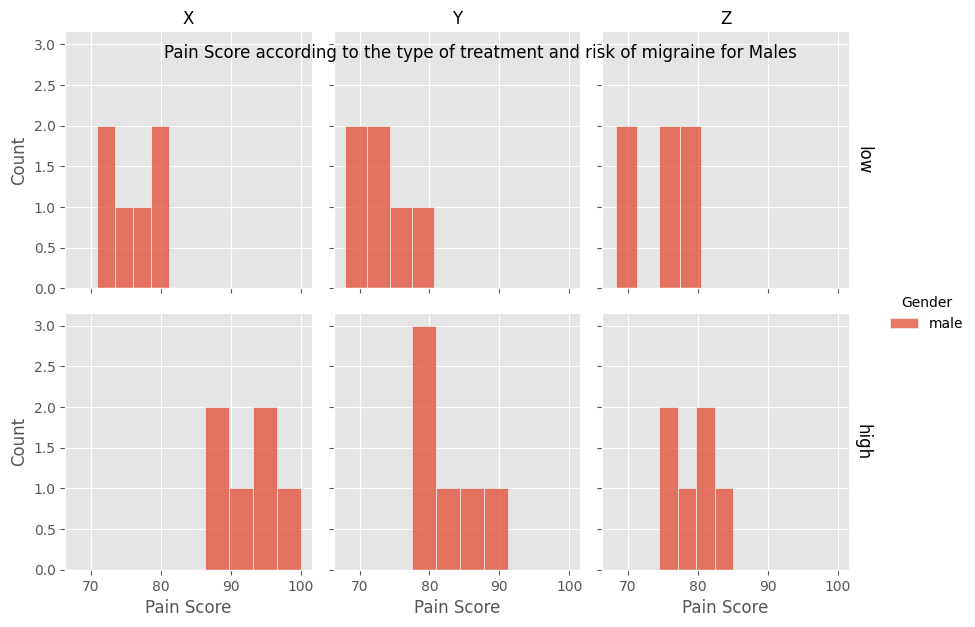

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
g = sns.FacetGrid(data[data['gender']=='male'], col="treatment", row="risk", hue="gender", margin_titles=True)
g.map_dataframe(sns.histplot, x="pain_score")

# Add titles and labels
g.set_axis_labels("Pain Score", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title="Gender")
g.figure.suptitle("Pain Score according to the type of treatment and risk of migraine for Males")
g.figure.subplots_adjust(top=1)

# Apply a classic theme
plt.style.use('ggplot')

# Show the plot
plt.show()

Here we can see that for treatment X and Y means for pain scores differ according to risk of migraine the most.

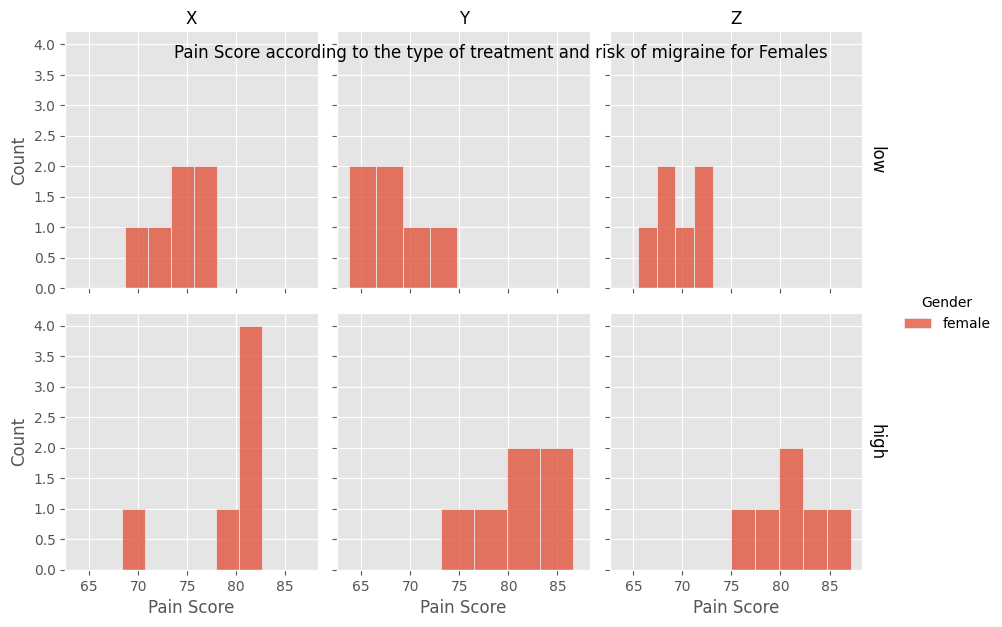

In [27]:
g = sns.FacetGrid(data[data['gender']=='female'], col="treatment", row="risk", hue="gender", margin_titles=True)
g.map_dataframe(sns.histplot, x="pain_score")

# Add titles and labels
g.set_axis_labels("Pain Score", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend(title="Gender")
g.figure.suptitle("Pain Score according to the type of treatment and risk of migraine for Females")
g.figure.subplots_adjust(top=1)

# Apply a classic theme
plt.style.use('ggplot')

# Show the plot
plt.show()

Here we can see that means of pain score for treatment Y and Z differ the most according to risk of migraine. For treatment X it is hard to tell.

Now let's see a boxplot to get a better view on how means look for this data.

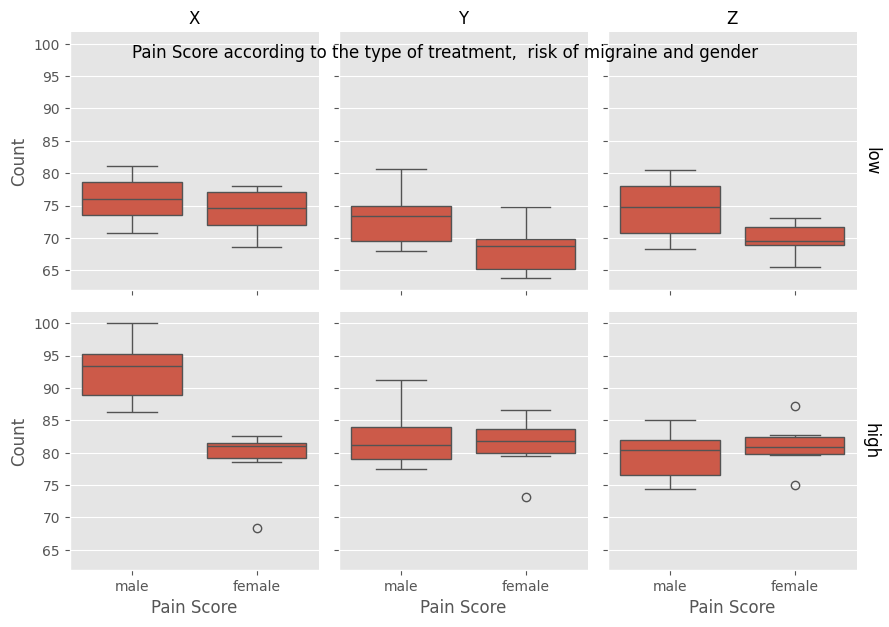

In [28]:

# Add titles and labels
g = sns.FacetGrid(data, col="treatment", row="risk",  margin_titles=True)
g.map_dataframe(sns.boxplot, x="gender", y="pain_score")

# Add titles and labels
g.set_axis_labels("Pain Score", "Count")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.figure.suptitle("Pain Score according to the type of treatment,  risk of migraine and gender")
g.figure.subplots_adjust(top=1)

# Apply a classic theme
plt.style.use('ggplot')

# Show the plot
plt.show()


Now we csan see that there are 4 outiers, the most extreme one is in treatment X for high risk of igrain for Females. Means differ the most for treatment X and high risk between genders. Also Treatment Y when there is low risk of migraines show differences in means between genders but variances are overlapping. Same thing is seen for treatment Z when there is low risk of migraine. Besides this means are rather similar.

Now let's take a look at contingency table.

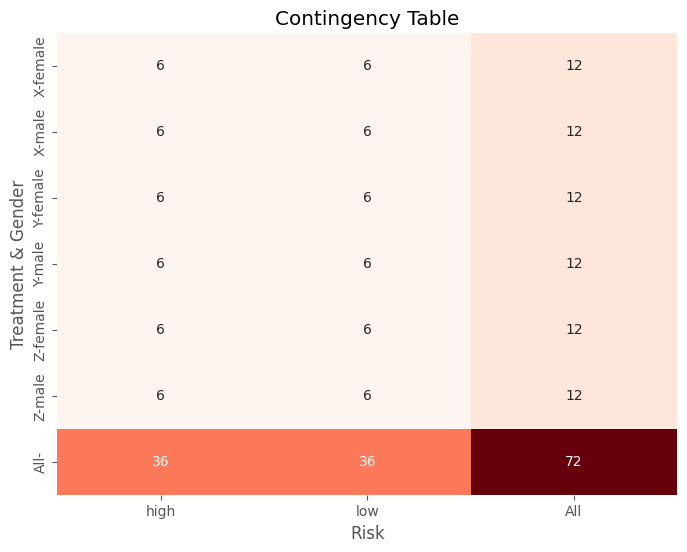

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
contingency_table = pd.crosstab(index=[data['treatment'], data['gender']], columns=data["risk"], margins=True)

plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Contingency Table")
plt.ylabel("Treatment & Gender")
plt.xlabel("Risk")
plt.show()

We can see that the distribution of people within groups is uniform.

## Assumptions
### Outliers

In [30]:
# Function to identify outliers using the IQR method
def identify_outliers(group):
    Q1 = group['pain_score'].quantile(0.25)
    Q3 = group['pain_score'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group['pain_score'] < lower_bound) | (group['pain_score'] > upper_bound)]
    return outliers

# Group the data by gender and education level and identify outliers
outliers = data.groupby(['treatment', 'risk', 'gender']).apply(identify_outliers).reset_index(drop=True)

# Display the outliers
print(outliers)

   id  gender  risk treatment  pain_score
0  57  female  high         X   68.360185
1  62  female  high         Y   73.144392
2  67  female  high         Z   74.988057
3  71  female  high         Z   87.142265


C:\Users\kopci\AppData\Local\Temp\ipykernel_15124\2372770194.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = data.groupby(['treatment', 'risk', 'gender']).apply(identify_outliers).reset_index(drop=True)


As seen on the boxplots, there are 4 outliers.

### Normality

I will check normality assumption using Shapiro-Wilk test.

H0 = Distributions within groups are normal.

H1 = Distributions within groups are not normal.

In [31]:
from scipy.stats import shapiro

# Function to perform the Shapiro-Wilk test
def shapiro_test(group):
    stat, p_value = shapiro(group['pain_score'])
    return pd.Series({'W': stat, 'p_value': p_value})

# Group the data by gender and education level and apply the Shapiro-Wilk test
shapiro_results = data.groupby(['treatment', 'risk', 'gender']).apply(shapiro_test).reset_index()

# Display the Shapiro-Wilk test results
print(shapiro_results)

   treatment  risk  gender         W   p_value
0          X  high  female  0.714180  0.008690
1          X  high    male  0.958434  0.807595
2          X   low  female  0.932551  0.599938
3          X   low    male  0.982194  0.961928
4          Y  high  female  0.939332  0.653824
5          Y  high    male  0.901730  0.384257
6          Y   low  female  0.926774  0.555428
7          Y   low    male  0.920272  0.507324
8          Z  high  female  0.971232  0.900604
9          Z  high    male  0.955478  0.784303
10         Z   low  female  0.957585  0.800946
11         Z   low    male  0.924051  0.535007


C:\Users\kopci\AppData\Local\Temp\ipykernel_15124\1461281258.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shapiro_results = data.groupby(['treatment', 'risk', 'gender']).apply(shapiro_test).reset_index()


After conducting Shapiro-Wilk test for each group, when considering alpha to be equal 0.05, we can see that every group is normally distributed but the group for Females whith high risk of migraine where treatment X was applied. The rest of groups are considered normal.
 
The group which is not normal according to this test may be affected by the outlierw which was detected ealier, so let's check that. I will delete the outlier and see the result of Shapiro-Wilk test.

In [32]:
data_cleaned = data[~((data['treatment'] == 'X') & 
                      (data['risk'] == 'high') & 
                      (data['gender'] == 'female') & 
                      (data['pain_score'] >= 68.36))]
# Group the data by gender and education level and apply the Shapiro-Wilk test
shapiro_results = data_cleaned.groupby(['treatment', 'risk', 'gender']).apply(shapiro_test).reset_index()

# Display the Shapiro-Wilk test results
print(shapiro_results)

   treatment  risk  gender         W   p_value
0          X  high    male  0.958434  0.807595
1          X   low  female  0.932551  0.599938
2          X   low    male  0.982194  0.961928
3          Y  high  female  0.939332  0.653824
4          Y  high    male  0.901730  0.384257
5          Y   low  female  0.926774  0.555428
6          Y   low    male  0.920272  0.507324
7          Z  high  female  0.971232  0.900604
8          Z  high    male  0.955478  0.784303
9          Z   low  female  0.957585  0.800946
10         Z   low    male  0.924051  0.535007


C:\Users\kopci\AppData\Local\Temp\ipykernel_15124\588749934.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  shapiro_results = data_cleaned.groupby(['treatment', 'risk', 'gender']).apply(shapiro_test).reset_index()


Now we can see that after deleting the outlier within group of treatment X, high risk and females, the distrinution is normal. Therefore for now I will conduct the rest of tests with the outlier to see how the variances differ.

But first let's see the QQ plots.

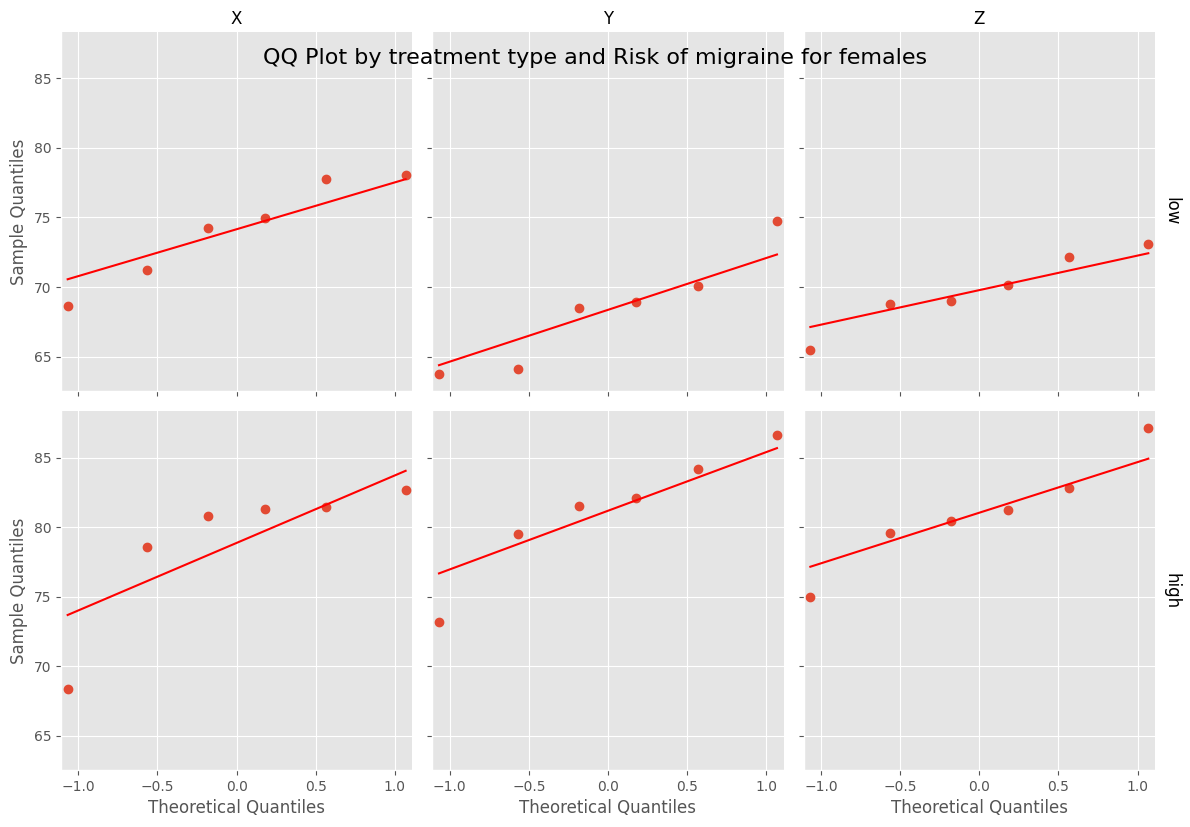

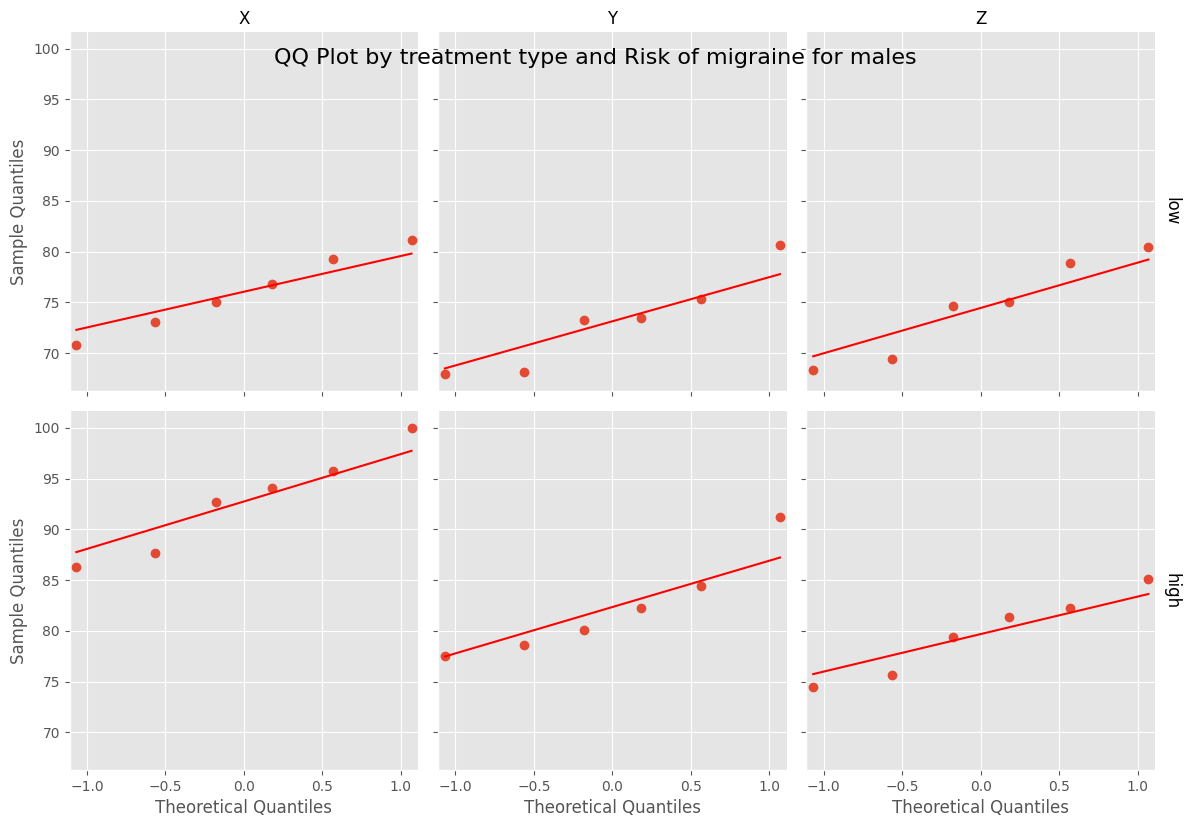

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Function to create a QQ plot 
def qqplot(x, **kwargs):
    ax = plt.gca()
    sm.qqplot(x, line='s', ax=ax)  # The red line of best fit
    ax.get_lines()[1].set_color('red')



# Create a FacetGrid for the QQ plots
g = sns.FacetGrid(data[data['gender'] =='female'], col="treatment", row="risk",  margin_titles=True, height=4)

# Map the function to the FacetGrid to create QQ plots
g.map(qqplot, 'pain_score')

# Add titles and labels
g.set_axis_labels("Theoretical Quantiles", "Sample Quantiles")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.figure.suptitle("QQ Plot by treatment type and Risk of migraine for females", size=16)
g.figure.subplots_adjust(top=1)
# Show the plot
plt.show()



# Create a FacetGrid for the QQ plots
g = sns.FacetGrid(data[data['gender'] =='male'], col="treatment", row="risk",  margin_titles=True, height=4)

# Map the function to the FacetGrid to create QQ plots
g.map(qqplot, 'pain_score')

# Add titles and labels
g.set_axis_labels("Theoretical Quantiles", "Sample Quantiles")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.figure.suptitle("QQ Plot by treatment type and Risk of migraine for males", size=16)
g.figure.subplots_adjust(top=1)

# Show the plot
plt.show()



The plots confirm all the previous claims.

#### Final conclusion:

One outlier within group of treatment X, high risk and for females is violating normality asssumption for this group.

After deleting the oultier, we can assume normality for this group.

For the rest of the groups we cannot reject the null hypothesis, therefore we can assume normality.

I will assume normality for all groups but keep in mind the one outlier violating this assumption and check its impact on homogenity of variance.

### Homogeneity of variance

Now I will check the homogenity of variance using Levene's test. I will conduct the test with the outlier that was making one group distribution not normal.

In [34]:
from scipy.stats import levene

# Perform Levene's test
# Group the data by gender and education level and extract the score values
grouped_data = data.groupby(['treatment', 'risk', 'gender'])['pain_score'].apply(list)

# Perform Levene's test
stat, p_value = levene(*grouped_data)

# Display the results
print(f"Levene's test statistic: {stat}")
print(f"p-value: {p_value}")

Levene's test statistic: 0.1785952808499546
p-value: 0.9982136500456728


As we can see, the p-value is quite high and greater than alfa 0,05, therefore we cannot reject the null hypothesis, there is  no significant difference between variances, we can assume the homogenity of variance.

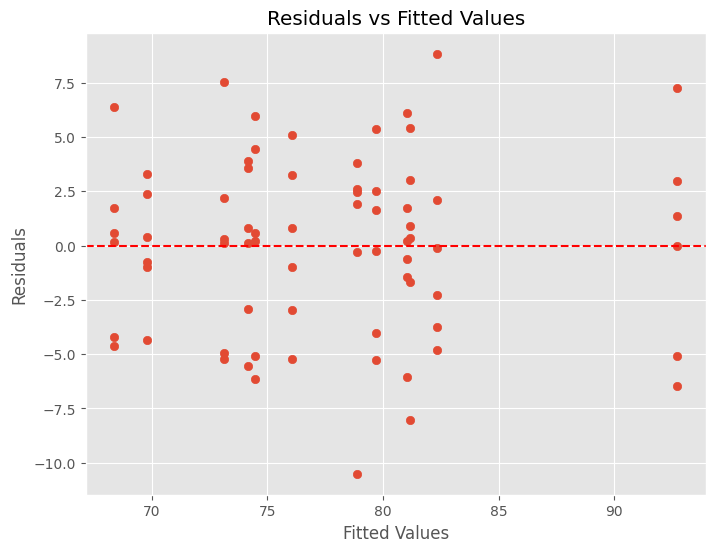

In [35]:
import statsmodels.formula.api as smf
model = smf.ols('pain_score ~ treatment * risk * gender', data=data).fit()

# Plot the residuals versus the fitted values
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(model.fittedvalues, model.resid)
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residuals vs Fitted Values')
plt.show()

On te plot of Residuals vs Fitted values there is no unusual pattern which will show violation therefore it confirms the claim of homogenity of variance.

Even though one outlier is violating the normality assumption, the homogenity of variance assumption not violated, therefore I will proceed with ANOVA tests with the outlier present in the data. This outlier, even though it's just one observation, can be an important measure.


## Anova

In [36]:
from statsmodels.stats.anova import anova_lm
model = smf.ols('pain_score ~ treatment * risk * gender', data=data).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print(anova_results)

                            sum_sq    df          F        PR(>F)
treatment               283.168031   2.0   7.317679  1.432844e-03
risk                   1793.555757   1.0  92.698774  8.799980e-14
gender                  313.358773   1.0  16.195746  1.625409e-04
treatment:risk           27.595016   2.0   0.713115  4.942214e-01
treatment:gender        129.182324   2.0   3.338353  4.220011e-02
risk:gender               2.730584   1.0   0.141128  7.084867e-01
treatment:risk:gender   286.595625   2.0   7.406255  1.334476e-03
Residual               1160.892871  60.0        NaN           NaN


#### Interpretation
**Treatment:** p value of treatment is 0.001 < alfa = 0.05 which indicates statistically significant effect of treatment on pain score.

**Risk:** p value of risk is close to 0 < alfa = 0.05 which indicates statistically significant effect of risk on pain score.

**Gender:** p value of gender is 0.0001 < alfa = 0.05 which indicates statistically significant effect of gender on pain score.

**Interaction between treatment and risk:** p value of this interaction is 0.49 > alfa = 0.05 which indicates that there is no statistically significant interaction effect on pain score.

**Interaction between treatment and gender:** p value of this interaction is 0.042 < alfa = 0.05 which indicates that there is statistically significant interaction effect on pain score.

**Interaction between risk and gender:** p value of this interaction is 0.7 > alfa = 0.05 which indicates that there is no statistically significant interaction effect on pain score.

**Interaction between treatment, risk and gender:** p value of this interaction is 0.0013 < alfa = 0.05 which indicates that there is statistically significant interaction effect on pain score.

**Conclusion**

Treatment, risk and gender have a statistically significant effect on pain scores. Interations treatment:gender and treatment:risk:gemnder have a statistically significant interaction effect on pain score but interactions treatment:risk and risk:gender have no statistically significant interaction effect on pain scores.

## Post-hoc tests

If there is a significant 3-way interaction effect, you can decompose it into:

-    Simple two-way interaction: run two-way interaction at each level of third variable,
-    Simple main effect: run one-way model at each level of second variable,
-    Simple pairwise comparisons: run pairwise or other post-hoc comparisons if necessary.

If you do not have a statistically significant three-way interaction, you need to determine whether you have any statistically significant two-way interaction from the ANOVA output. You can follow up a significant two-way interaction by simple main effects analyses and pairwise comparisons between groups if necessary.

### Two-way interactions

Since 3-way interaction was significant based on 3-way ANOVA output above, I will conduct 2-way ANNOVA on treatment and risk interaction between genders.

#### Interactions between Treatment x Risk between each level of Gender

In [41]:
model = smf.ols('pain_score ~ treatment * risk', data=data[data['gender']=='male']).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print("For Males:")
print(anova_results)

For Males:
                    sum_sq    df          F        PR(>F)
treatment       393.710706   2.0   9.154682  7.876787e-04
risk            968.124984   1.0  45.022276  1.954190e-07
treatment:risk  203.220142   2.0   4.725337  1.644381e-02
Residual        645.097320  30.0        NaN           NaN


##### Interpretation for Males
**Treatment:** p value of treatment is 0.00078 < alfa = 0.05 which indicates statistically significant effect of treatment on pain score.

**Risk:** p value of risk is close to 0 < alfa = 0.05 which indicates statistically significant effect of risk on pain score.

**Interaction between treatment and risk:** p value of this interaction is 0.016 < alfa = 0.05 which indicates that there is statistically significant interaction effect on pain score.

**Conclusion:**

There is a statistically significant effect of treatment, risk and interaction between treatment and risk on pain scoree for males.

In [42]:
model = smf.ols('pain_score ~ treatment * risk', data=data[data['gender']=='female']).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print("For Females:")
print(anova_results)

For Females:
                    sum_sq    df          F        PR(>F)
treatment        18.639649   2.0   0.542065  5.871351e-01
risk            828.161356   1.0  48.168001  1.042751e-07
treatment:risk  110.970499   2.0   3.227165  5.377519e-02
Residual        515.795551  30.0        NaN           NaN


##### Interpretation for Females
**Treatment:** p value of treatment is 0.587 > alfa = 0.05 which indicates no statistically significant effect of treatment on pain score.

**Risk:** p value of risk is close to 0 < alfa = 0.05 which indicates statistically significant effect of risk on pain score.

**Interaction between treatment and risk:** p value of this interaction is 0.0537 > alfa = 0.05 which indicates that there is no statistically significant interaction effect on pain score.

**Conclusion:**

There is a statistically significant effect of risk on pain scores for females but there is no statistically significant effect of treatment and interaction between treatment and risk on pain scores between females.

### Main effects

There is a significant 2-way interaction between treatment and risk for males, therefore I will first conduct:
- a simple 1-way ANOVA for treatment at each level of risk for males
- a simple 1-way ANOVA for overall treatment for females
- a simple 1-way ANOVA for overall risk for females.

#### Main effect of Treatment for each level of Risk for Males

In [43]:
# Function to perform ANOVA test within each group
def group_anova(group):
    model = smf.ols('pain_score ~ treatment', data=group).fit()
    return anova_lm(model, typ=2)

# Group the data by gender and apply the ANOVA test
anova_results = data[data['gender']=='male'].groupby('risk').apply(group_anova).reset_index()

# Display the results
print("For Males:")
print(anova_results)

For Males:
   risk    level_1      sum_sq    df          F    PR(>F)
0  high  treatment  571.396212   2.0  12.687808  0.000595
1  high   Residual  337.762949  15.0        NaN       NaN
2   low  treatment   25.534637   2.0   0.623132  0.549583
3   low   Residual  307.334371  15.0        NaN       NaN


C:\Users\kopci\AppData\Local\Temp\ipykernel_15124\1266326970.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  anova_results = data[data['gender']=='male'].groupby('risk').apply(group_anova).reset_index()


#### Interpretation for Males
**Treatment and high risk of migraine:**  p value is 0.0006 < 0.05 which indicates statisctically significant effect.

**Treatment and low risk of migraine:**  p value is 0.549 > 0.05 which indicates no statisctically significant effect.

**Conclusion:**

For Males the simple main effect of treatment on pain scores is statistically signifficant only when there is high risk of miraine.

#### Main effect of Treatment overall for Females

In [50]:
# Perform ANOVA
model = smf.ols('pain_score ~ treatment', data=data[data['gender']=='female']).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print("For Females:")
print(anova_results)

For Females:
                sum_sq    df         F    PR(>F)
treatment    18.639649   2.0  0.211388  0.810547
Residual   1454.927406  33.0       NaN       NaN


#### Interpretation of treatment effect for Females
**Treatment**  p value is 0.811 > 0.05 which indicates no statisctically significant effect.

For Females the simple main effect of treatment on pain scores is not statistically signifficant.

#### Main effect of Risk overall for Females

In [51]:
# Perform ANOVA
model = smf.ols('pain_score ~ risk', data=data[data['gender']=='female']).fit()
anova_results = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print("For Females:")
print(anova_results)

For Females:
              sum_sq    df          F        PR(>F)
risk      828.161356   1.0  43.627576  1.425737e-07
Residual  645.405699  34.0        NaN           NaN


#### Interpretation of risk effect for Females
**Risk**  p value is close to 0 < 0.05 which indicates statisctically significant effect.

For Females the simple main effect of risk of migraine on pain scores is statistically signifficant.

#### Conclusion
For Males there is a statistically significant difference in means when there is high risk of migraine for every type of treatment (X, Y, Z).

For Females there is a statistically significant difference in means for every type of risk of migraine.

### Pairwise comparisons

Since there is a statistically signifficant effect of treatment for high risk for males and of risk overall for females i will conduct pairwise comparisons:
- of high risk within each type of treatment for males
- of each level of risk for females.

I will use Tukey's HSD since size of groups are the same.

In [65]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Function to perform pairwise comparisons within each group
data_high_risk_males = data[(data['gender']=='male') & (data['risk']=='high')]
pairwise_results = pg.pairwise_tests(dv='pain_score', between='treatment', data=data_high_risk_males, padjust='bonferroni')

# Display the results
print(pairwise_results)

    Contrast  A  B  Paired  Parametric         T   dof alternative     p-unc  \
0  treatment  X  Y   False        True  3.559851  10.0   two-sided  0.005183   
1  treatment  X  Z   False        True  4.903869  10.0   two-sided  0.000620   
2  treatment  Y  Z   False        True  1.013219  10.0   two-sided  0.334843   

     p-corr    p-adjust    BF10    hedges  
0  0.015548  bonferroni   8.291  1.897182  
1  0.001859  bonferroni  40.866  2.613461  
2  1.000000  bonferroni   0.644  0.539983  


#### Interpretation of pairwise comparison of treatment for males with high risk of migraine
**Treatement X & Y:** p value is 0.005 and 0.015 after bonferroni adjustment < alfa 0.05 we reject the null hypothesis and conclude that there is a statistically significant difference in pain scores between X and Y treatment. 

**Treatement X & Z:** p value is 0.00062 and 0.002 after bonferroni adjustment < alfa 0.05 we reject the null hypothesis and conclude that there is a statistically significant difference in pain scores between X and Z treatment. 

**Treatement Y & Z:** p value is 0.33 and 1 after bonferroni adjustment > alfa 0.05 we cannot reject the null hypothesis and conclude that there is no statistically significant difference in pain scores between Y and Z treatment. 

In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Function to perform pairwise comparisons within each group
data_females = data[data['gender']=='female']
pairwise_results = pg.pairwise_tests(dv='pain_score', between='risk', data=data_females, padjust='bonferroni')

# Display the results
print(pairwise_results)

  Contrast     A    B  Paired  Parametric         T   dof alternative  \
0     risk  high  low   False        True  6.605117  34.0   two-sided   

          p-unc       BF10    hedges  
0  1.425737e-07  7.181e+04  2.152779  


#### Interpretation of pairwise comparison of risk of migraine for female
**High & Low risk:** p value is close to 0 < alfa 0.05 we reject the null hypothesis and conclude that there is a statistically significant difference in pain scores between high and low risk of migraine for females.

## Final Conclusion

For males with high risk of migraine there is a statistically significant difference in pain score means between treatment X & Y and X & Z.

For females there is a is a statistically significant difference in pain score means between high and low risk of migraine but treatment type does not have a statistically signifficanf effect on pain scores in for this gender group.

REFERENCES
mostly Report 7 from course on enauczanie